In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import lightkurve as lk

# Introduction to lightkurve - phase folding data

This notebook covers how to phase fold data. Phase folding is something that is very often used in astronomy as it allows you to build up signal by folding multiple transit events ontop of one another. 

Notes:

- You need to run each cell. Do this by either pressing the 'run' button at the top of the page or pressing shift+enter (this is what Nora does in the videos). 

- When you runa cell, a star will appear in the brackets to the left of the cell while the cell is runnning. Once it has successfully completed running the code the star will turn into a number (often it runs so fast that you don't see the star).

- Text following a # is ignored by the code, so all comments are shown following # (except in this cell because I made this into a text cell)


In [2]:
TIC = 'TIC 55525572'

In [3]:
# search the available data and select data from a couple of sectors 

'''
(this is a comment and not code - for longer comments you can use tripple quotation marks)

note, there are a number of ways to select what sectors you want to look at. First check what sectors are available using:

print (lk.search_lightcurve(TIC, author = 'SPOC'))

this will print the available sectors for a given target for you. You can then select them using: 

1. a range of sectors using'[start, end]': 'lk.search_lightcurve(TIC, author = 'SPOC')[0:9]'
2. listing the sectors you want: 'lk.search_lightcurve(TIC, author = 'SPOC', sector = [5,6,8]'). (the square brackets are important!)
3. a single sector: 'lk.search_lightcurve(TIC, author = 'SPOC', sector = 5')
4. the first available secor: 'lk.search_lightcurve(TIC, author = 'SPOC')[0]'
5. all of the available data: 'lk.search_lightcurve(TIC, author = 'SPOC')'

'''

available_data_select = lk.search_lightcurve(TIC, author = 'SPOC')[0:9] # !! CHANEG THIS (see above)

# download the selected data and 'stitch' the data from the different sectors together
lc_collection = available_data_select.download_all().stitch()


<IPython.core.display.Javascript object>


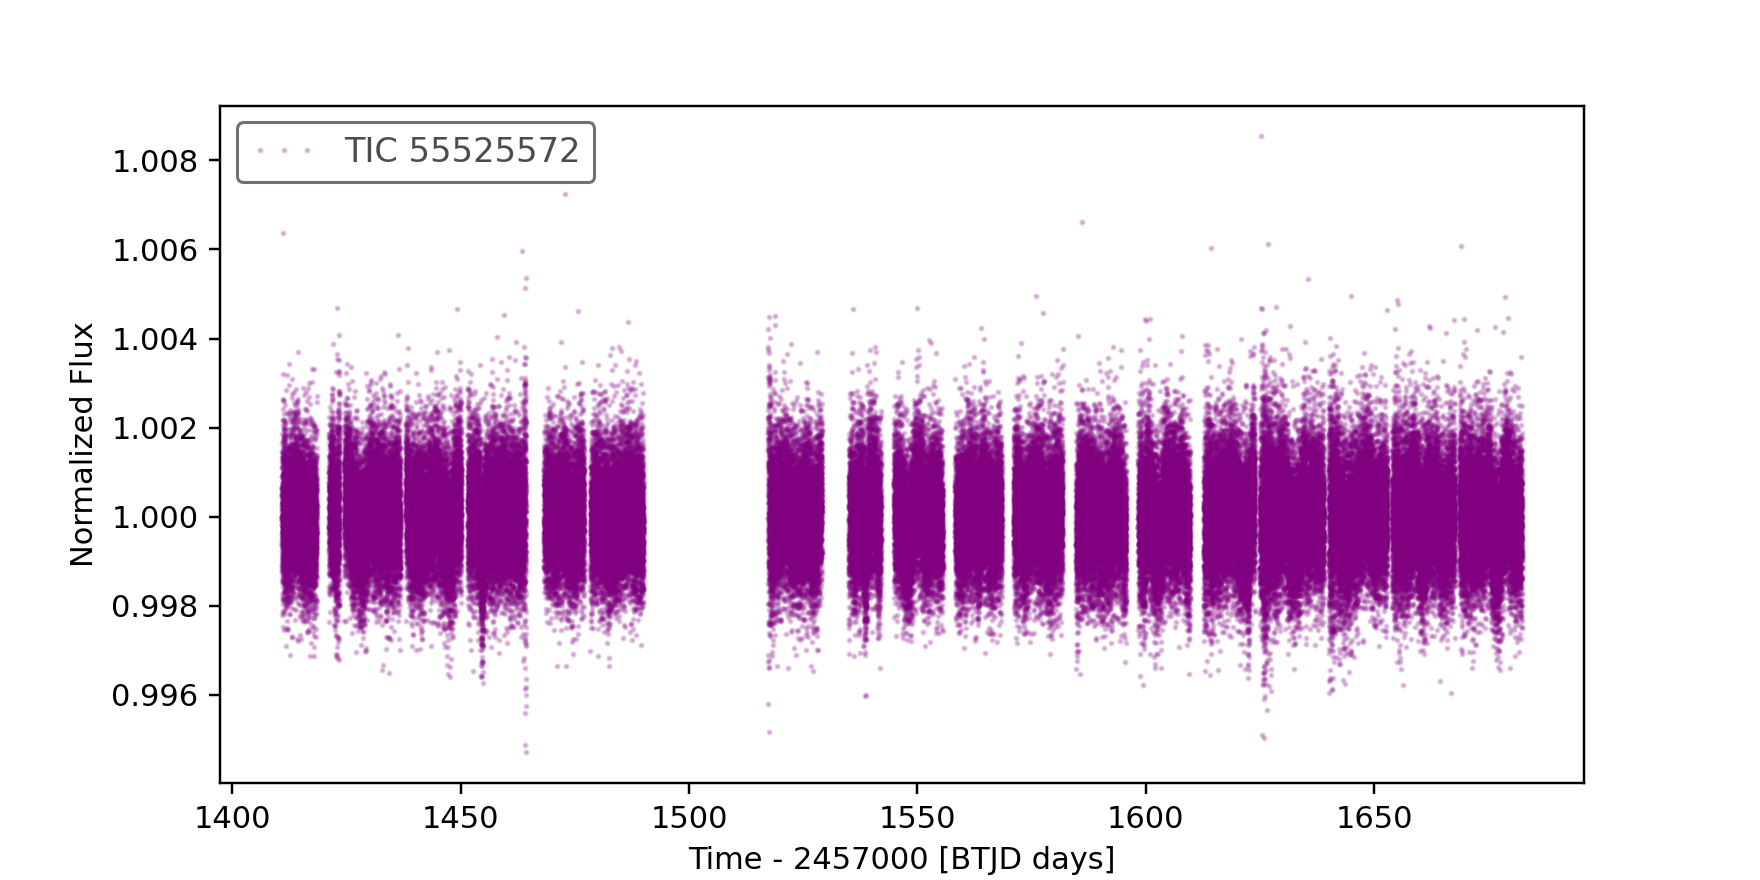

In [4]:
# plot the figure
fig, ax = plt.subplots(figsize = (8,4))

lc_collection.plot(ax = ax, linewidth = 0, marker = 'o', color = 'purple', markersize = 1, alpha = 0.2)


In [5]:
# for known systems you can look these parameters up on ExoFOP (https://exofop.ipac.caltech.edu/tess/)

period  = 83.8979 # time between transit events (duration of a year on this planet)
t0 = 2125.847 # time of one of the transit events 

# NOTE: on ExoFOP the T0 is called 'epoch' and you need to subtract 2457000 from the value to get it into the right units!


In [6]:
# use the lightkurve function .fold to phase fold the data (make sure to give it the period and t0)
lc_phased = lc_collection.fold(period = period, epoch_time = t0)

<IPython.core.display.Javascript object>


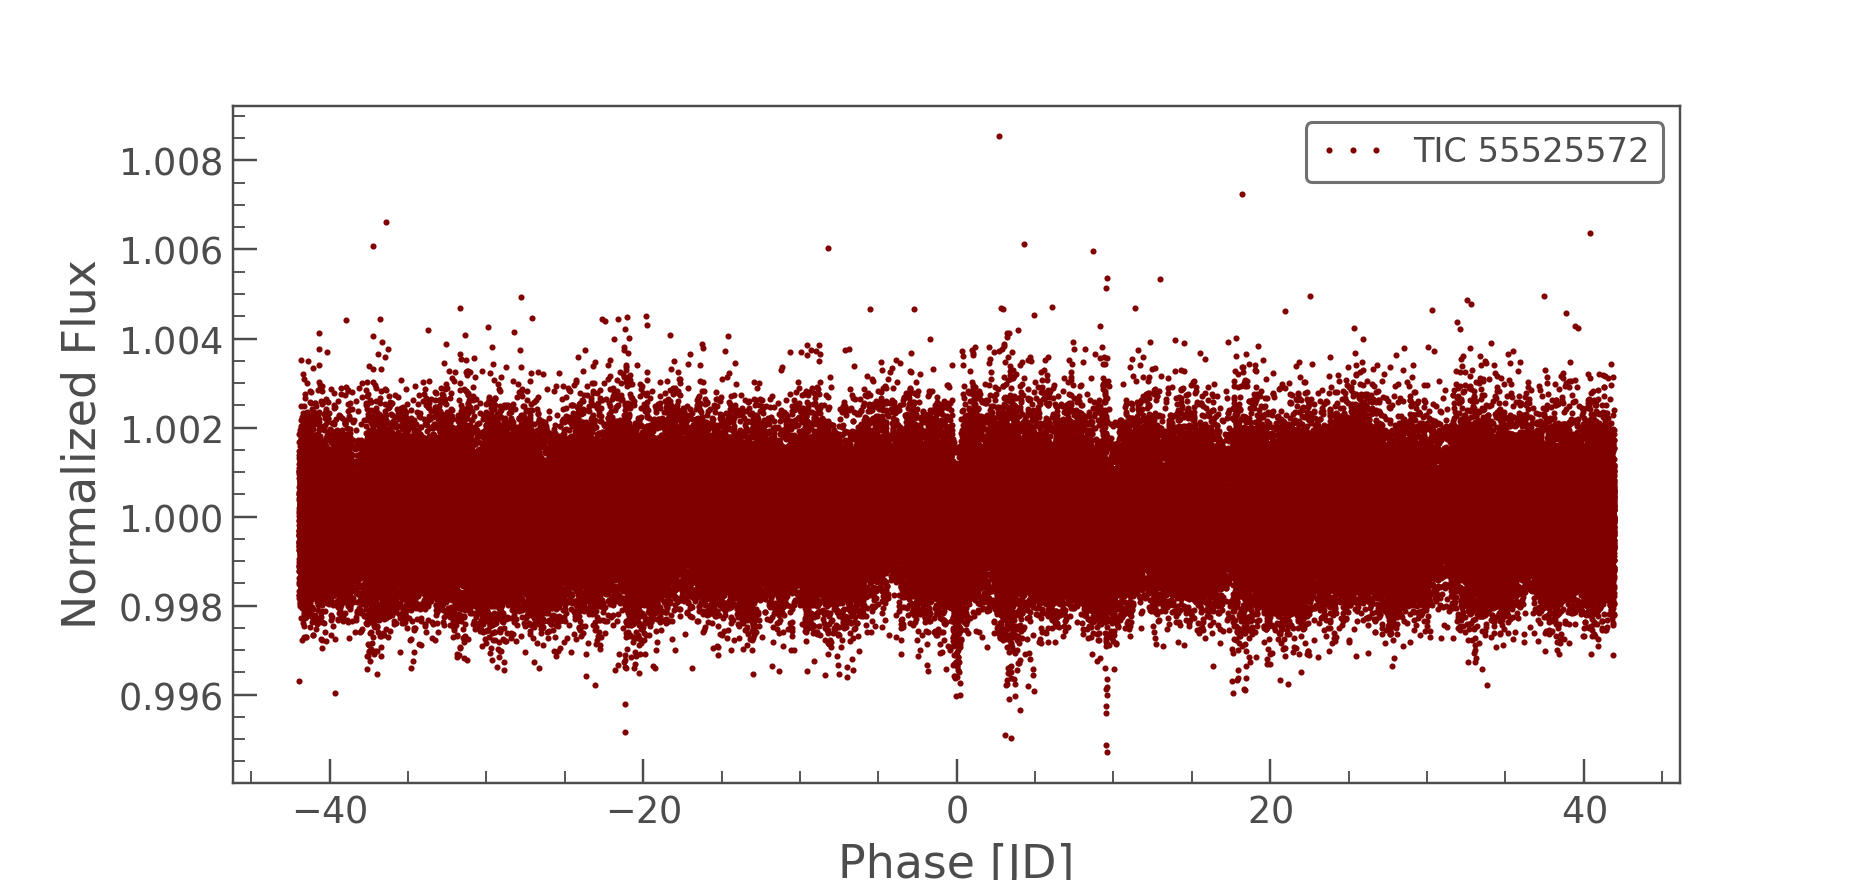

In [7]:
# plot the phase folded data (the transit event is at phase = 0 so try zooming in on it to see it better)
lc_phased.plot(linewidth =0, color = 'maroon', marker = '.')

In [8]:
# we can bin the phase folded data to make the transit more obvious (watch the episode on binning for more information on this)
lc_phased_binned = lc_phased.bin(15/24/60)

<IPython.core.display.Javascript object>


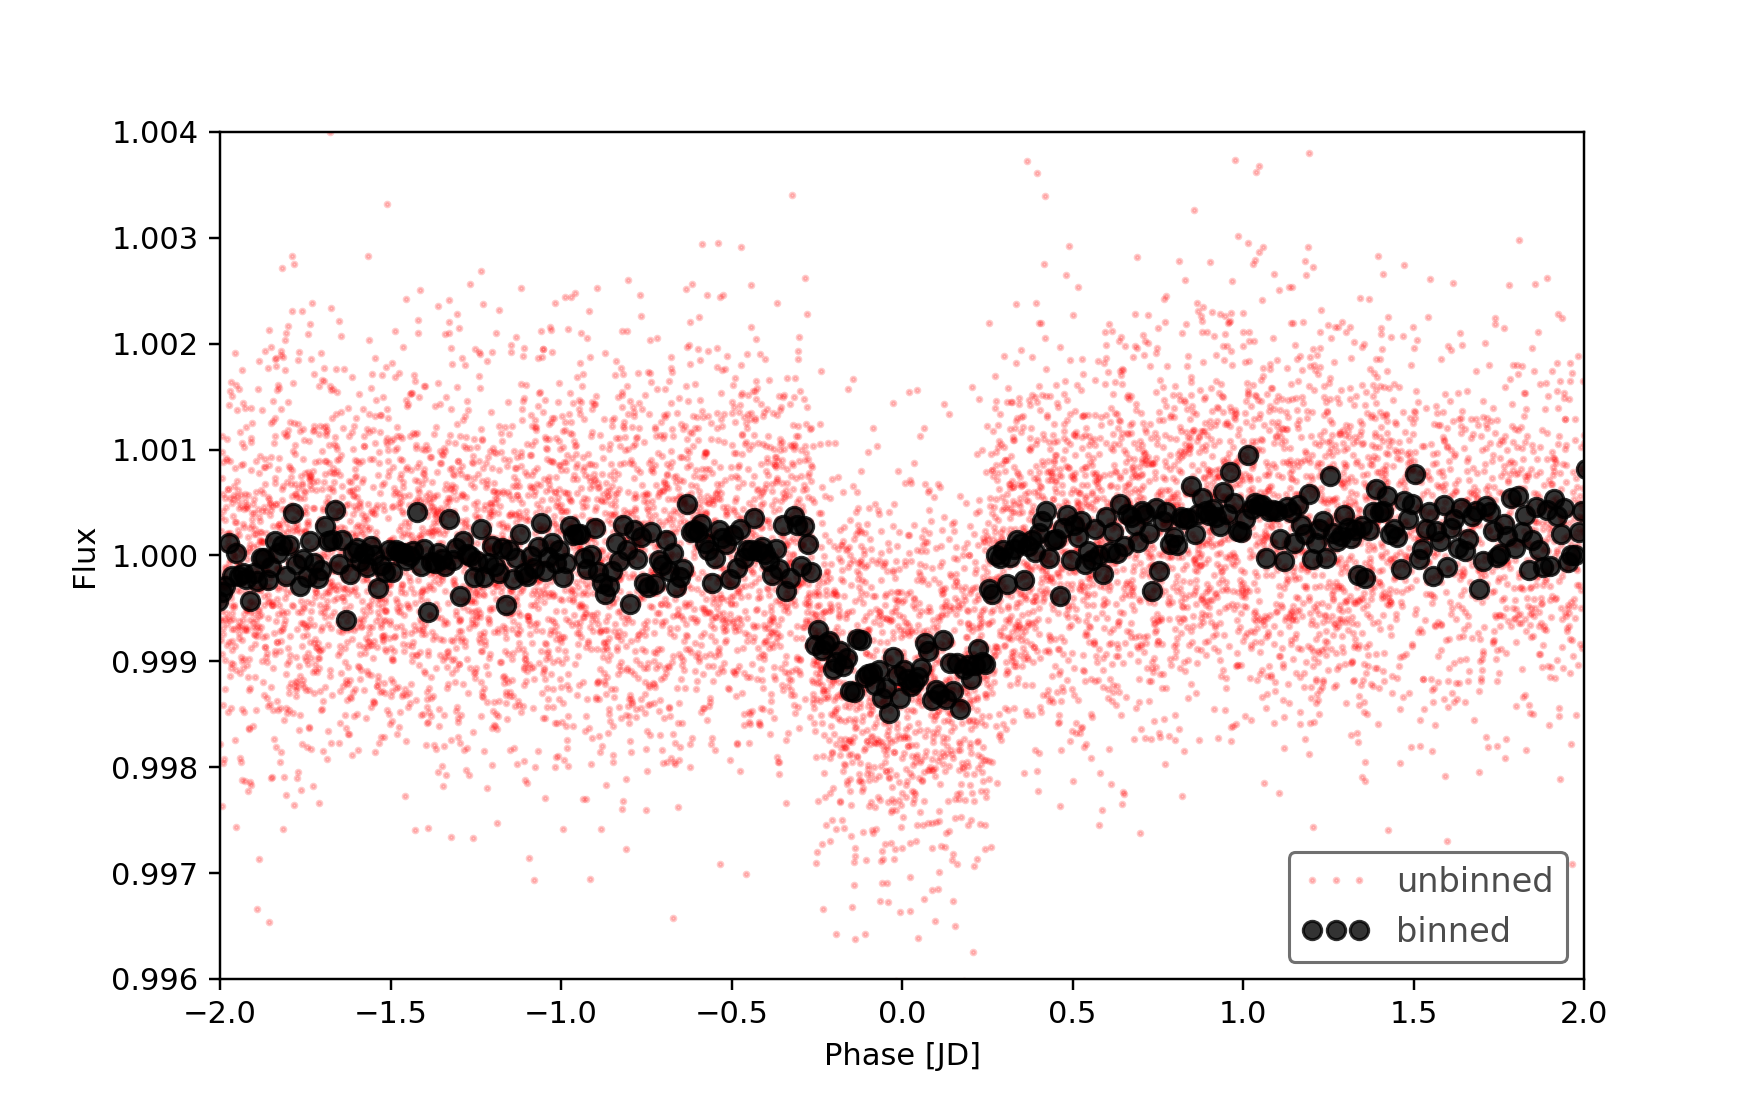

(0.996, 1.004)

In [9]:
# plot both the binned and unbinned data on the same figure

#define a plotting region
fig, ax = plt.subplots(figsize = (8,5))

lc_phased.plot(ax = ax, marker = '.', linewidth = 0, color = 'red', alpha = 0.2, markersize = 3, label = 'unbinned')
lc_phased_binned.plot(ax = ax, marker = 'o', linewidth = 0, color = 'k', alpha = 0.8, markersize = 6, label = 'binned')

# set x and y axis limits (for different targets these limits will be different!)
plt.xlim(-2,2)
plt.ylim(0.996, 1.004)

<IPython.core.display.Javascript object>


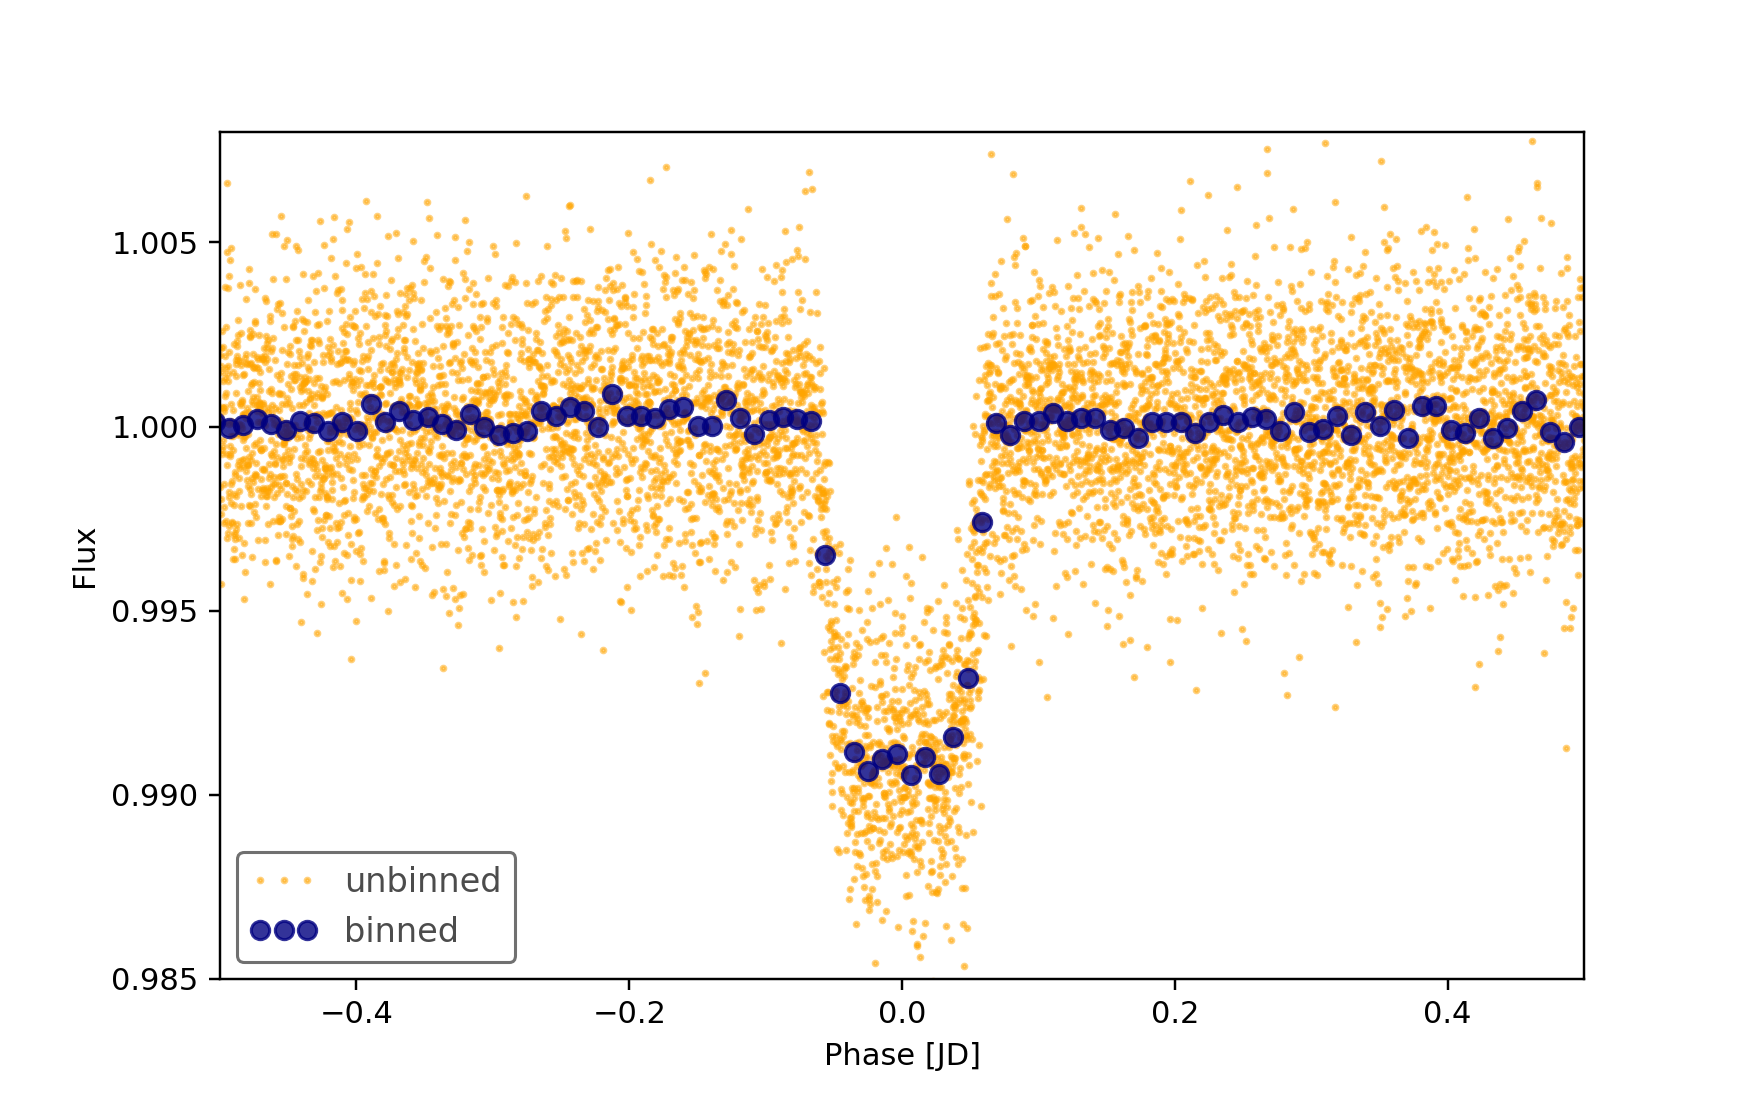

(0.985, 1.008)

In [10]:
# lets try this for a different target - I have added an '_2' to everything to seperate it from the previous example
# we'll do it in one cell but doing it in mutliple cells works just as well! 

# define a TIC ID
TIC = 'TIC 284475976'

# search what SPOC data for this target for sector 23 (for other targets first check what sectors are available)
sector_data_2 = lk.search_lightcurve(TIC, author = 'SPOC', sector = 23)

# normalize the data
lc_2 = sector_data_2.download().normalize() #as we're only lookign at one sector we'll use the .normalize() function instead of the .stitch function

# define the pre-determined period and t0
period_2 = 2.14363
t0_2 = 2458929.420036 - 2457000 # this value is from ExoFOP so subtract 2457000 to get it in to the right units

# phase fold
lc_phased_2 = lc_2.fold(period = period_2, epoch_time = t0_2)

# bin the phase folded lightcurve
lc_phased_binned_2 = lc_phased_2.bin(15/24/60)


# --- plot the data ---

fig, ax = plt.subplots(figsize = (8,5))

lc_phased_2.plot(ax = ax, marker = '.', linewidth = 0, color = 'orange', alpha = 0.5, markersize = 3, label = 'unbinned')
lc_phased_binned_2.plot(ax = ax, marker = 'o', linewidth = 0, color = 'navy', alpha = 0.8, markersize = 6, label = 'binned')

# set x and y axis limits (note that the limits need to be different from the previous example)
plt.xlim(-0.5,0.5)
plt.ylim(0.985, 1.008)